### Econ Problem Set 5

#### 2018 Boot Camp, Dr. Evans
#### Name: Zunda Xu ( zunda@uchicago.edu )

The problem set is in cooperation with Shirley, Zeshun Zong and Fiona Fan.

#### Problem 1

In [4]:
#import library and packages
import numpy as np
import pandas as pd
import scipy.stats as sts
import os
import matplotlib.pyplot as plt
import scipy.optimize as opt
import warnings
warnings.filterwarnings('ignore')
from scipy import special
from scipy.integrate import quad
import requests
%matplotlib inline

In [2]:
# import data
data = np.loadtxt('clms.txt')
print(data)

[ 361.65  123.04  541.77 ...,   97.43  186.88  119.19]


#### Part(a)

Text(0,0.5,'Percent of observations')

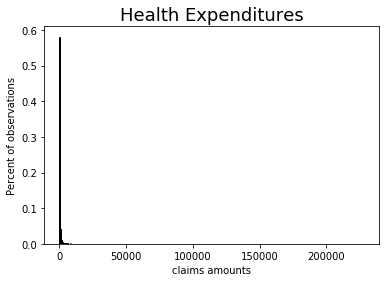

In [6]:
#create histogram 
weights = (1 / data.shape[0]) * np.ones_like(data)
count, bins, ignored = plt.hist(data, 1000, weights=weights,
                                edgecolor='k')
plt.title('Health Expenditures', fontsize=18)
plt.xlabel('claims amounts')
plt.ylabel('Percent of observations')

(0, 800)

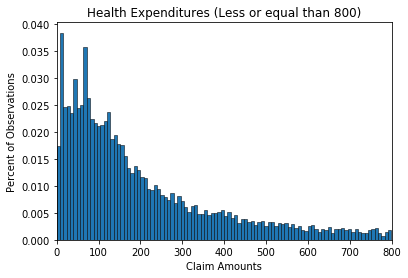

In [9]:
data_part = np.asarray([x for x in data if x <=800])
weights = (1 / data.shape[0]) * np.ones_like(data_part)
n, bins, ignored = plt.hist(data_part, 100, weights=weights, edgecolor='black', linewidth=0.5)
plt.title('Health Expenditures (Less or equal than 800)')
plt.xlabel('Claim Amounts')
plt.ylabel('Percent of Observations')
plt.xlim(0, 800)

From the two histograms shown above, we find the second one is preferred because deleting outliers makes the graph more readable. 

#### Part(b)

In [10]:
beta_guess = (data.var())/data.mean()
alpha_guess = data.mean()/beta_guess  
params_guess = (alpha_guess, beta_guess)

In [11]:
def GA_pdf(xvals, alpha, beta):
    pdf_vals = 1/((beta ** alpha) * special.gamma(alpha)) * (xvals ** (alpha - 1)) * np.exp(-xvals/beta)
    
    return pdf_vals

def log_lik_GA(xvals, alpha, beta):
    pdf_vals = GA_pdf(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [12]:
def crit(params, args):
    
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_GA(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [13]:
ga_args = data
bnds = ((1e-6, None), (1e-6, None))
results = opt.minimize(crit, params_guess, args=(ga_args), method ='L-BFGS-B', bounds=bnds)
alpha_ga, beta_ga = results.x
print(results)

      fun: 82076.451605662558
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        ,  0.09022187])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([  2.21755323e-01,   2.19110647e+04])


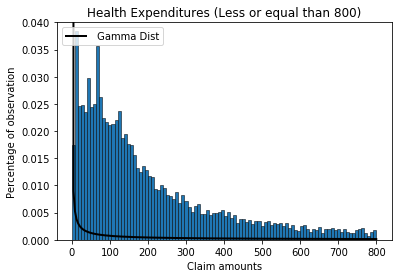

In [15]:
# Plot the histogram of the data
data_part = np.asarray([x for x in data if x <=800])
weights = (1 / data.shape[0]) * np.ones_like(data_part)
n, bins, ignored = plt.hist(data_part, 100, weights=weights, edgecolor='black',
                                linewidth=0.5)
plt.title('Health Expenditures (Less or equal than 800)')
plt.xlabel('Claim amounts')
plt.ylabel('Percentage of observation')

x = np.linspace(1e-10, 800, 200)
y = GA_pdf(x, alpha_ga, beta_ga)
plt.plot(x, y,'k-',
         linewidth=2, label=' Gamma Dist')
plt.legend(loc='upper left')
plt.ylim(0, 0.04)

plt.show()

#### Part (c)

In [16]:
beta_guess = beta_ga
alpha_guess = alpha_ga
m_guess = 1
params_guess = (alpha_guess, beta_guess, m_guess) 

In [17]:
def GG_pdf(xvals, alpha, beta, m):
    pdf_vals = m/((beta**alpha)*special.gamma(alpha/m))*(xvals**(alpha - 1))*np.exp(-(xvals/beta)**m)
    
    return pdf_vals

def log_lik_GG(xvals, alpha, beta, m):
    pdf_vals = m/((beta**alpha)*special.gamma(alpha/m))*(xvals**(alpha - 1))*np.exp(-(xvals/beta)**m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit_GG(params, args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_GG(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [18]:
gg_args = data
bnds = ((1e-6, None), (1e-6, None), (1e-6, None))
results = opt.minimize(crit_GG, params_guess, args=(gg_args), method ='L-BFGS-B', bounds=bnds)
alpha_gg, beta_gg, m_gg = results.x
print(results)

      fun: 82076.446790848655
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.65253072,  0.09167707, -1.04337232])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 2
   status: 0
  success: True
        x: array([  2.21737619e-01,   2.19110644e+04,   9.97091566e-01])


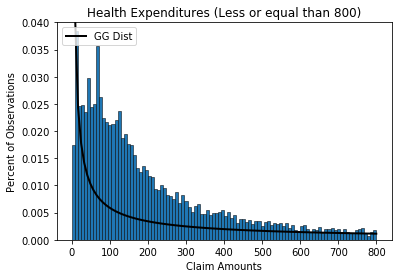

In [19]:
weights = (1 / data.shape[0]) * np.ones_like(data_part)
n, bins, ignored = plt.hist(data_part, 100, weights=weights, edgecolor='black',
                                linewidth=0.5)
plt.title('Health Expenditures (Less or equal than 800)')
plt.xlabel('Claim Amounts')
plt.ylabel('Percent of Observations')

x = np.linspace(1e-10, 800, 100)
y = 8 * GG_pdf(x, alpha_gg, beta_gg, m_gg)
plt.plot(x, y,'k-',
         linewidth=2, label='GG Dist')
plt.legend(loc='upper left')
plt.ylim(0, 0.04)

#### Part (d)

In [20]:
q_guess = 6200
a_guess = m_gg
b_guess = q_guess**(1/a_guess)*beta_gg
p_guess = alpha_gg/m_gg

In [21]:
def GB2_pdf(xvals, a, b ,p, q):
    x = a*xvals**(a*p-1)
    y = (b**(a*p))*special.beta(p,q)*((1+(xvals/b)**a)**(p+q))
    pdf_vals = x/y
    
    return pdf_vals

def log_lik_GB2(xvals, a, b, p, q):
    pdf_vals = GB2_pdf(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

def crit_GB2(params, args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_GB2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [22]:
params_guess = (a_guess, b_guess, p_guess, q_guess) 

gb2_args = data
bnds = ((1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None))
results = opt.minimize(crit_GB2, params_guess, args=(gb2_args), method ='L-BFGS-B', bounds=bnds)
a_gb2, b_gb2, p_gb2, q_gb2 = results.x
print(results)

      fun: 76397.042830277365
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.7459464 ,  0.        ,  2.61788955,  1.86118996])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 120
      nit: 13
   status: 0
  success: True
        x: array([  6.82691194e-01,   1.39353300e+08,   1.04593255e+00,
         6.19917275e+03])


(0, 0.04)

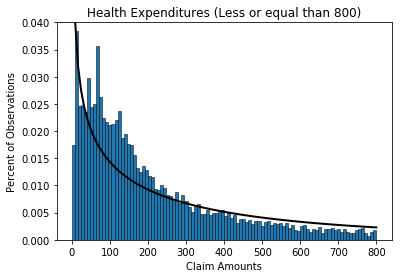

In [24]:
data_part = np.asarray([x for x in data if x <=800])
weights = (1 / data.shape[0]) * np.ones_like(data_part)
n, bins, ignored = plt.hist(data_part, 100, weights=weights, edgecolor='black',
                                linewidth=0.5)
plt.title('Health Expenditures (Less or equal than 800)')
plt.xlabel('Claim Amounts')
plt.ylabel('Percent of Observations')

x = np.linspace(1e-10, 800, 100)
y = 8 * GB2_pdf(x, a_gb2, b_gb2, p_gb2, q_gb2)
plt.plot(x, y,'k-',
         linewidth=2)

plt.ylim(0, 0.04)

#### Part (d)

In [25]:
GB2 = log_lik_GB2(data, a_gb2, b_gb2, p_gb2, q_gb2)
GG = log_lik_GG(data, alpha_gg, beta_gg, m_gg)
GA = log_lik_GA(data, alpha_ga, beta_ga)
GG_val = abs(2 * (GG - GB2))
GA_val = abs(2 * (GA - GB2))
pval_GG = 1.0 - sts.chi2.cdf(GA_val, 4)
pval_GA = 1.0 - sts.chi2.cdf(GA_val, 4)
print('chi squared of H0 with 4 degrees of freedom p-value (Generalized Gamma Distribution) = ', pval_GG)
print('chi squared of H0 with 4 degrees of freedom p-value (Gamma Distribution) = ', pval_GA)

chi squared of H0 with 4 degrees of freedom p-value (Generalized Gamma Distribution) =  0.0
chi squared of H0 with 4 degrees of freedom p-value (Gamma Distribution) =  0.0


In [26]:
g1 = lambda x: GB2_pdf(x, a_gb2, b_gb2, p_gb2, q_gb2)
g2 = lambda x: GA_pdf(x, alpha_ga, beta_ga)
print("Prediction using GB2: "+ str(quad(g1, 1000, np.inf)[0]))
print("Prediction using GA: "+ str(quad(g2, 1000, np.inf)[0]))

Prediction using GB2: 0.15952542171837628
Prediction using GA: 0.45195974447843174


#### Problem 2

In [27]:
# Import the package
from scipy import special
from scipy.stats import norm

In [28]:
# Set parameters
alpha_init = 0.4
rho_init = 0.7
mu_init = 8
sigma_init = 0.1
params_init = (alpha_init, rho_init, mu_init, sigma_init)

In [29]:
# Import data
data = np.loadtxt('MacroSeries.txt', delimiter=",")
beta = 0.99
c = data[:, 0]
k = data[:, 1]
w = data[:, 2]
r = data[:, 3]

#### Part (a)

In [30]:
#equation 3
def get_z(w, k, alpha):

    z = np.log(w) - np.log(1 - alpha) - alpha * np.log(k)
    
    return z
def logpdf(z, rho, mu, sigma):
    z[0] = mu
    mean = rho * z[:-1] + (1 - rho) * mu
    logpdf_vals = norm.logpdf(z, np.hstack([mu, mean]), sigma)
    
    return logpdf_vals

In [31]:
def crit1(params, *args):
   
    alpha, rho, mu, sigma = params
    w, k  = args
    neglogpdf_vals = -(logpdf(get_z(w, k, alpha), rho, mu, sigma).sum())
    
    return neglogpdf_vals

In [32]:
args1 = (w, k)
bnds = ((1e-6, 1-1e-6), (-1+1e-6, 1-1e-6),(1e-6, None), (1e-6, None))

results1 = opt.minimize(crit1, params_init, args=(args1), method ='L-BFGS-B', bounds=bnds)
alpha1, rho1, mu1, sigma1 = results1.x
print(results1)

      fun: -95.43447335111037
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-18.57000882,   0.79145366,  -1.44541872,  -6.6305418 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 390
      nit: 40
   status: 0
  success: True
        x: array([ 0.80491239,  0.57960268,  5.01565017,  0.09288782])


In [33]:
results1.hess_inv.todense()

array([[  6.18714190e+01,  -1.10559438e+01,  -7.71659091e+02,
         -3.40680013e-01],
       [ -1.10559438e+01,   1.32098309e+01,   1.40016714e+02,
          3.23312059e+00],
       [ -7.71659091e+02,   1.40016714e+02,   9.62452003e+03,
          4.84981927e+00],
       [ -3.40680013e-01,   3.23312059e+00,   4.84981927e+00,
          9.01621055e-01]])

#### Part (b)

In [34]:
def get_z(r, k, alpha):
    
    z = np.log(r) - np.log(alpha) - (alpha - 1) * np.log(k)
    
    return z

In [35]:
def crit2(params, *args):
   
    alpha, rho, mu, sigma = params
    r, k  = args
    neglogpdf_vals = -(logpdf(get_z(r, k, alpha), rho, mu, sigma).sum())
    
    return neglogpdf_vals

In [36]:
args2 = (r, k)
results2 = opt.minimize(crit2, params_init, args=(args2), method ='L-BFGS-B', bounds=bnds)
alpha2, rho2, mu2, sigma2 = results2.x
print(results2)

      fun: -95.552985133022403
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -3.23865379e-03,   2.55795385e-05,  -1.81898940e-04,
        -1.41113787e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 270
      nit: 37
   status: 0
  success: True
        x: array([ 0.85063321,  0.51753245,  2.50438543,  0.09306388])


In [37]:
results1.hess_inv.todense()

array([[  6.18714190e+01,  -1.10559438e+01,  -7.71659091e+02,
         -3.40680013e-01],
       [ -1.10559438e+01,   1.32098309e+01,   1.40016714e+02,
          3.23312059e+00],
       [ -7.71659091e+02,   1.40016714e+02,   9.62452003e+03,
          4.84981927e+00],
       [ -3.40680013e-01,   3.23312059e+00,   4.84981927e+00,
          9.01621055e-01]])

#### Part (c)

In [38]:
z_star = get_z(1, 7500000, alpha2)
mean = rho2 * 10 + (1 - rho2) * mu2
print('Probability : ' + str(1-norm.cdf(z_star, mean, sigma2)))

Probability : 1.0


#### Problem 3

In [39]:
# Import packages
from scipy.integrate import quad
from scipy.linalg import pinv

In [40]:
# Import data
data = np.loadtxt('usincmoms.txt')
data[:,1]

array([   2500.,    7500.,   12500.,   17500.,   22500.,   27500.,
         32500.,   37500.,   42500.,   47500.,   52500.,   57500.,
         62500.,   67500.,   72500.,   77500.,   82500.,   87500.,
         92500.,   97500.,  102500.,  107500.,  112500.,  117500.,
        122500.,  127500.,  132500.,  137500.,  142500.,  147500.,
        152500.,  157500.,  162500.,  167500.,  172500.,  177500.,
        182500.,  187500.,  192500.,  197500.,  225000.,  300000.])

#### Part (a)

Text(0,0.5,'Frequency')

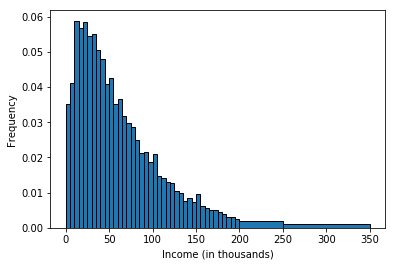

In [41]:
width = np.hstack([np.ones(len(data[:,1]) - 2)*5, 50, 100])
left=data[:,1]/1000
plt.bar(left, np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20]), width, edgecolor='k')
b=np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20])
plt.xlabel('Income (in thousands)')
plt.ylabel('Frequency')

#### Part (b)

In [42]:
#define weight matrix 
xvals=data[:,1]
data_moments=data[:,0]
W = np.diag(data_moments)

In [43]:
def model_moments_ln(xvals, mu, sigma):
    pdf_vals = sts.lognorm.pdf(xvals, s = sigma, scale = np.exp(mu))
    
    return pdf_vals


def err_vec(xvals, data_moments , mu, sigma, simple=False):
    g = lambda x: model_moments_ln(x, mu, sigma)
    model_moments = np.zeros(len(xvals))
    for i in range(len(xvals)):
        model_moments[i] = quad(g, xvals[i]-2500, xvals[i] + 2500)[0] 
    if simple:
        err_vec = model_moments - data_moments
    else:
        err_vec = (model_moments - data_moments) / data_moments
    
    return err_vec

def crit(params, *args): 
    mu, sigma = params
    xvals, data_moments, W = args
    err = err_vec(xvals, data_moments, mu, sigma)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [44]:
mean = (xvals * data_moments).sum()
sd = ((xvals - mean) ** 2 * data_moments).sum()

mu_init = np.log(mean/(np.sqrt(1 + sd/mean ** 2)))
sigma_init = np.sqrt(np.log(1 + sd/mean ** 2))

bnds = ((None, None), (1e-5, None))
params_init = (mu_init, sigma_init)

ln_args = (xvals, data_moments, W)
results = opt.minimize(crit, params_init, args=(ln_args), bounds = bnds)
print(results)
mu_ln, sigma_ln = results.x

      fun: 0.062992115913487745
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -4.89885910e-06,   1.10328413e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 21
      nit: 6
   status: 0
  success: True
        x: array([ 10.86071336,   1.03705759])


In [45]:
error=err_vec(xvals, data_moments , mu_ln, sigma_ln, simple=False)
print('Error vector=', error)

Error vector= [ -6.61339682e-01   6.77089678e-02   6.25577698e-03   1.08637342e-01
   4.99278458e-02   6.23867243e-02  -3.08256395e-02  -3.72224304e-02
  -7.20981869e-02  -1.20057053e-02  -1.41610600e-01  -5.08736547e-02
  -1.71732562e-01  -1.27817905e-01  -1.52944150e-01  -1.90725329e-01
  -1.56885061e-01  -8.43137893e-02  -1.67026809e-01  -1.15720588e-01
  -2.73108331e-01  -4.12853485e-02  -8.76641729e-02  -7.09827715e-02
  -1.21011770e-01   7.06090419e-04  -3.18792165e-02   1.90962510e-01
  -9.83385980e-03   6.87579996e-02  -2.33848391e-01   1.31262265e-01
   1.26743865e-01   2.09080527e-01   1.23762595e-01   2.31092509e-01
   3.36080730e-01   5.96287037e-01   4.38966844e-01   6.55287275e-01
  -8.33409655e-01  -9.33507367e-01]


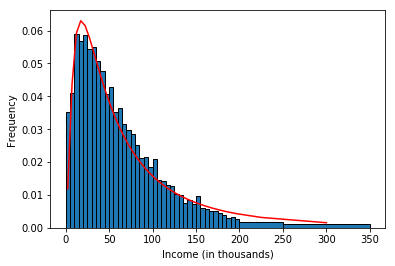

In [48]:
# Plot the histogram of the data
width = np.hstack([np.ones(len(data[:,1]) - 2)*5, 50, 100])
left=data[:,1]/1000
plt.bar(left, np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20]), width, edgecolor='k')
b=np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20])
plt.xlabel('Income (in thousands)')
plt.ylabel('Frequency')

# Plot the estimated GMM PDF
x=left*1000
g = lambda x: model_moments_ln(x, mu_ln, sigma_ln)
y = np.zeros(len(xvals))
for i in range(len(xvals)):
        y[i] = quad(g, x[i]-2500, x[i] + 2500)[0] 
x=x/1000
plt.plot(x, y, color = 'red')

#### Part (c)

In [49]:
alpha_init  = 3
beta_init = 20000

In [50]:
def model_moments_ga(xvals, alpha, beta): 
    pdf_vals = 1/((beta ** alpha) * special.gamma(alpha)) * (xvals ** (alpha - 1)) * np.exp(-xvals/beta)
    
    return pdf_vals


def err_vec_ga(xvals,  data_moments, alpha, beta, simple=False):
    g = lambda x: model_moments_ga(x, alpha, beta)
    model_moments = np.zeros(len(xvals))
    
    for i in range(len(xvals)):
        model_moments[i] = quad(g, xvals[i]-2500, xvals[i] + 2500)[0]
    if simple:
        err_vec = model_moments - data_moments
    else:
        err_vec = (model_moments - data_moments) / data_moments
    
    return err_vec

def crit_ga(params, *args):
    alpha, beta = params
    xvals, frequency, W = args
    err = err_vec_ga(xvals,  data_moments, alpha, beta)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [51]:
bnds1 = ((1e-5, None), (1e-5, None))
params_init1 = (alpha_init, beta_init)

ga_args = (xvals,  data_moments, W)
results1 = opt.minimize(crit_ga, params_init1, args=(ga_args), bounds = bnds1)
print(results1)
alpha_ga, beta_ga = results1.x

      fun: 0.044024595343090125
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  5.85781423e-05,   2.77555756e-09])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 150
      nit: 29
   status: 0
  success: True
        x: array([  1.40602644e+00,   4.56026483e+04])


In [52]:
error=err_vec_ga(xvals, data_moments , alpha_ga, beta_ga, simple=False)
print('Error vector=', error)

Error vector= [ -4.44975902e-02   2.19133433e-01  -5.84029926e-02   3.00999888e-03
  -3.39252172e-02   1.13858389e-02  -4.08990868e-02  -1.01149486e-02
  -1.16457717e-02   8.59943165e-02  -3.04744979e-02   9.67435169e-02
  -2.50184575e-02   4.15611516e-02   2.21921724e-02  -1.68041478e-02
   2.76016216e-02   1.15926678e-01   1.18368638e-02   6.75209100e-02
  -1.30332729e-01   1.33771825e-01   6.38060852e-02   6.55632867e-02
  -1.04994420e-02   1.03306923e-01   4.32813142e-02   2.52045143e-01
   1.36488907e-02   6.35572965e-02  -2.60093095e-01   5.85646341e-02
   2.00273255e-02   5.74093912e-02  -5.18896804e-02   6.70224267e-04
   4.49408006e-02   1.99756431e-01   3.81039494e-02   1.44920897e-01
  -9.10284564e-01  -9.84073853e-01]


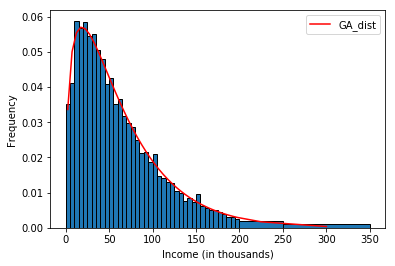

In [54]:
# Plot the histogram of the data
width = np.hstack([np.ones(len(data[:,1]) - 2)*5, 50, 100])
left=data[:,1]/1000
plt.bar(left, np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20]), width, edgecolor='k')
b=np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20])
plt.xlabel('Income (in thousands)')
plt.ylabel('Frequency')

# Plot the estimated GMM PDF
x=left*1000
g = lambda x: model_moments_ga(x, alpha_ga, beta_ga)
y = np.zeros(len(xvals))
for i in range(len(xvals)):
        y[i] = quad(g, x[i]-2500, x[i] + 2500)[0] 
x=x/1000
plt.plot(x, y, 'red',label='GA_dist')
plt.legend(loc='upperright')

#### Part (d)

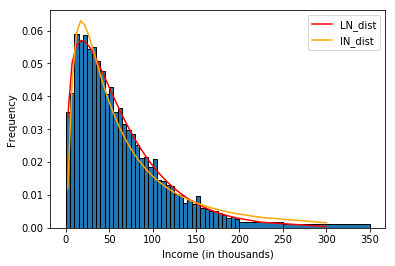

In [59]:
# Plot the histogram of the data
width = np.hstack([np.ones(len(data[:,1]) - 2)*5, 50, 100])
left=data[:,1]/1000
plt.bar(left, np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20]), width, edgecolor='k')
b=np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20])
plt.xlabel('Income (in thousands)')
plt.ylabel('Frequency')
# Plot the estimated GMM PDF
x=left*1000
g = lambda x: model_moments_ga(x, alpha_ga, beta_ga)
y = np.zeros(len(xvals))
for i in range(len(xvals)):
        y[i] = quad(g, x[i]-2500, x[i] + 2500)[0] 
x=x/1000
plt.plot(x, y, 'red',label="LN_dist")


# Plot the estimated GMM PDF
x=left*1000
g = lambda x: model_moments_ln(x, mu_ln, sigma_ln)
y = np.zeros(len(xvals))
for i in range(len(xvals)):
        y[i] = quad(g, x[i]-2500, x[i] + 2500)[0] 
x=x/1000
plt.plot(x, y, 'orange',label="IN_dist")
plt.legend()

#### Part (e)

In [60]:
W = np.identity(42)

ga_args1 = (xvals, data_moments, W)
results2 = opt.minimize(crit_ga, params_init1, args=(ga_args1), bounds = bnds1)
print(results2)
alpha_ga2, beta_ga2 = results2.x

      fun: 2.1244347800366548
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.30766534e-06,  -8.88178420e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 102
      nit: 27
   status: 0
  success: True
        x: array([  1.40911189e+00,   4.46590193e+04])


In [63]:
e = err_vec_ga(xvals, data_moments, alpha_ga2, beta_ga2)
Omega_2 = np.outer(e.T, e) 
W1 = pinv(Omega_2)
params_init2 = (3, 20000)
ga_args3 = (xvals, data_moments, W1)
results3 = opt.minimize(crit_ga, params_init2, args=(ga_args3), bounds = bnds1)
print(results3)
alpha_ga3, beta_ga3 = results3.x

      fun: nan
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -5.67508849e+08,   6.91466779e+05])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 684
      nit: 40
   status: 2
  success: False
        x: array([  1.40911076e+00,   4.46592657e+04])


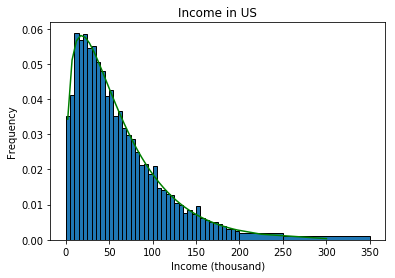

In [64]:
width = np.hstack([np.ones(len(data[:,-1]) - 2)*5, 50, 100])

plt.bar(left, np.hstack([data[:, 0][:-2], data[:, 0][-2]/10, data[:, 0][-1]/20]), width, edgecolor='k')
plt.title('Income in US')
plt.xlabel('Income (thousand)')
plt.ylabel('Frequency')


x=left*1000
g = lambda x: model_moments_ga(x,alpha_ga3, beta_ga3)
y = np.zeros(len(xvals))
for i in range(len(xvals)):
        y[i] = quad(g, x[i]-2500, x[i] + 2500)[0] 
x=x/1000
plt.plot(x, y, 'g')

#### Problem 4

In [65]:
# Load data
data = np.loadtxt('MacroSeries.txt', delimiter=",")
c = data[:, 0]
k = data[:, 1]
w = data[:, 2]
r = data[:, 3]

In [66]:
def get_z(r,k,alpha):
    z = np.log(r) - np.log(alpha) - (alpha - 1) * np.log(k)
    return z

In [67]:
def data_moments(c, k, w, r, alpha, beta, rho, mu):
    z = get_z(r, k, alpha)
    eq7 = z[1:] - rho * z[:-1] - (1 - rho) * mu
    eq8 = (z[1:] - rho * z[:-1] - (1 - rho) * mu) * z[:-1]
    eq9 = beta * alpha * np.exp(z[1:]) * k[1:] ** (alpha - 1) * c[:-1]/c[1:] - 1
    eq10 = (beta * alpha * np.exp(z[1:]) * k[1:] ** (alpha - 1) * c[:-1]/c[1:] - 1) * w[:-1]
    
    return eq7.mean(), eq8.mean(), eq9.mean(), eq10.mean()

def err_vec(c, k, w, r, alpha, beta, rho, mu, simple = True):
    mo_moments = np.zeros(4)
    da_moments = np.array(data_moments(c, k, w, r, alpha, beta, rho, mu)).reshape(1, 4)
    if simple:
        err_vec = (mo_moments - da_moments)[0]
    else:
        err_vec = (mo_moments - da_moments) / da_moments
    return err_vec

def crit(params, *args):
    alpha, beta, rho, mu = params
    c, k, w, r, weight  = args
    err = err_vec(c, k, w, r, alpha, beta, rho, mu)
    crit_val = np.dot(np.dot(err.T, weight), err) 
    
    return crit_val

In [68]:
weight = np.identity(4)
alpha_init = 0.4
beta_init = 0.8
rho_init = 0.7
mu_init = 9

params_init = (alpha_init, beta_init, rho_init, mu_init)
bnds = ((1e-5, 1-1e-5), (1e-5, 1-1e-5), (-1+1e-5, 1-1e-5), (1e-5, None))
args = (c, k, w, r, weight)
results = opt.minimize(crit, params_init, args=(args), bounds = bnds, method = 'L-BFGS-B')
print(results)

      fun: 0.0011455607806731194
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.83364434e+00,   3.79576602e+05,  -1.01266593e-02,
        -1.03554101e-01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 310
      nit: 34
   status: 0
  success: True
        x: array([ 0.47211116,  0.99      ,  0.73082573,  9.00090032])


#### Problem 5

In [69]:
# Import data
data = np.loadtxt('MacroSeries.txt', delimiter=",")
c = data[:, 0]
k = data[:, 1]
w = data[:, 2]
r = data[:, 3]
y = data[:, 4]

In [70]:
weight = np.identity(6)
alpha_init = 0.8
beta = 0.99
rho_init = 0.7
mu_init = 0.2
sigma_init = 0.2
params_init = (alpha_init, rho_init, mu_init, sigma_init)
bnds = ((0.01, 0.99), (-0.99, 0.99), (5, 14), (0.01, 1.1))
args = (c, k, w, r, y, weight)

In [71]:
def data_moments(c, k, y):
    mean_c = c.mean()
    mean_k = k.mean()
    cy=c/y
    mean_cy = cy.mean()
    var_y = y.var()
    corr_ck = np.corrcoef(c, k)[0, 1]
    corr_c = np.corrcoef(c[1:], c[:-1])[0, 1]
    
    return mean_c, mean_k, mean_cy, var_y, corr_ck, corr_c

In [72]:
meank = k.mean()
def simulate_moments(alpha, rho, mu, sigma, T=100, S=1000):
    z1 = mu
    k1 = meank
    epsilon = np.random.normal(0, scale=sigma, size=(S, T)) 
    zmat = np.zeros((S, T))
    kmat = np.zeros((S, T))
    cmat = np.zeros((S, T))
    ymat = np.zeros((S, T))
    zmat[:, 0] = z1 * np.ones(S)
    kmat[:, 0] = k1 * np.ones(S)
    
    for i in range(1, T):
        zmat[:, i] = rho * zmat[:, i-1] + (1 - rho) * mu + epsilon[:, i]
        kmat[:, i] = alpha * beta * np.exp(zmat[:, i]) + kmat[:, i-1] ** alpha
    wmat = (1 - alpha) * np.exp(zmat) * kmat ** alpha
    rmat = alpha * np.exp(zmat) * kmat ** (alpha - 1)
    ymat = np.exp(zmat)*pow(kmat,alpha)
    cmat[:, 0] = wmat[:, 0] + rmat[:, 0] * kmat[:, 0]
    for i in range(1, T):
        cmat[:, i] = wmat[:, i] + rmat[:, i] * kmat[:, i] - kmat[:, i-1]
   
    
   
    smean_c = cmat.mean(axis=1).mean()
    smean_k = kmat.mean(axis=1).mean()
    svar_y = ymat.var(axis=1).mean()
    cy = cmat/ymat
    smean_cy = cy.mean(axis=1).mean()
    corr_ck = np.zeros(T)
    corr_c = np.zeros(T - 1)
    
    for i in range(T):
        corr_ck[i] = np.corrcoef(cmat[:, i], kmat[:, i])[0, 1]
    for i in range(T-1):
        corr_c[i] = np.corrcoef(cmat[1:, i], cmat[:-1, i])[0, 1]  
    scorr_ck = corr_ck[2:].mean()
    scorr_c = corr_c[1:].mean()
    
    return smean_c, smean_k, svar_y, smean_cy, scorr_ck, scorr_c

In [73]:
def err_vec(c, k, w, r, y, alpha, rho, mu, sigma):
    mo_moments = np.array(simulate_moments(alpha, rho, mu, sigma))
    da_moments = np.array(data_moments(c, k, y))
    
    err_vec = ((mo_moments - da_moments) / da_moments)
    return err_vec

def crit(params, *args):
    alpha, rho, mu, sigma = params
    c, k, w, r, y, weight  = args
    err = err_vec(c, k, w, r, y, alpha, rho, mu, sigma)
    crit_val = np.dot(np.dot(err.T, weight), err) 
    
    return crit_val

In [74]:
results = opt.minimize(crit, params_init, args=(args), bounds = bnds, method = 'L-BFGS-B')
print(results)

      fun: 9.5501665706519277e+26
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -9.70015878e+30,   1.23373240e+31,  -1.59790122e+31,
        -3.40722951e+31])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 100
      nit: 2
   status: 0
  success: True
        x: array([ 0.80000056,  0.70000086,  5.        ,  0.20000266])
